In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [354]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("papuabarat.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  187 non-null    datetime64[ns]
 1   Tn       186 non-null    float64       
 2   Tx       186 non-null    float64       
 3   Tavg     184 non-null    float64       
 4   RH_avg   184 non-null    float64       
 5   RR       141 non-null    float64       
 6   ss       165 non-null    float64       
 7   ff_x     186 non-null    float64       
 8   ddd_x    186 non-null    float64       
 9   ff_avg   186 non-null    float64       
 10  ddd_car  186 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 16.2+ KB


<ipython-input-354-615749a239aa>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [355]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.0,30.1,10.5,NaN
1,2023-02-01,24.1,32.6,8888.0,28.1
2,2023-03-01,24.5,33.4,NaN,28.2
3,2023-04-01,25.4,32.6,8888.0,28.3
4,2023-05-01,25.3,33.8,8888.0,29.2
...,...,...,...,...,...
182,2023-06-27,26.9,29.8,0.7,27.3
183,2023-06-28,23.7,33.0,34.6,28.1
184,2023-06-29,25.0,31.6,NaN,27.5
185,2023-06-30,24.0,32.6,NaN,28.3


In [356]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

10

In [357]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [358]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [359]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.0,30.1,10.5,NaN
1,31,31,2023-01-02,24.0,32.1,6.0,27.6
2,59,60,2023-01-03,25.3,32.7,NaN,28.6
3,90,92,2023-01-04,24.6,33.1,NaN,28.4
4,120,123,2023-01-05,24.2,31.1,64.1,27.5
...,...,...,...,...,...,...,...
177,42,43,2023-12-02,23.8,33.0,NaN,27.3
178,70,72,2023-12-03,25.6,29.6,2.1,27.4
179,101,104,2023-12-04,26.1,29.6,0.1,27.8
180,131,135,2023-12-05,24.1,32.7,108.8,29.3


In [360]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          1
RR         44
Tavg        3
dtype: int64

In [361]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [362]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

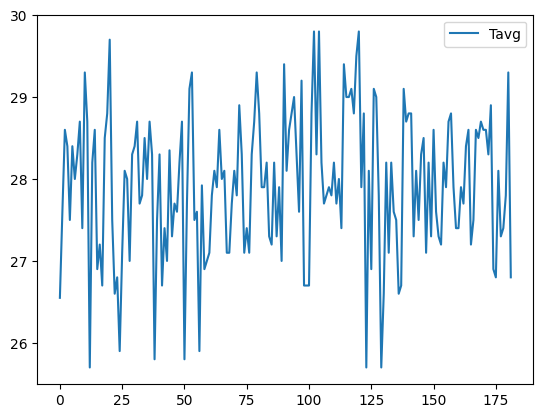

In [363]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

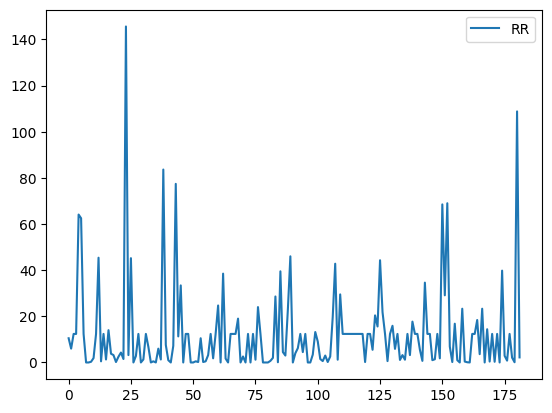

In [364]:
#plotting tavg
df1[['RR']].plot()

In [365]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.0,30.1,10.500000,26.55,32.1,27.6,6.000000
1,31,31,2023-01-02,24.0,32.1,6.000000,27.60,32.7,28.6,12.373913
2,59,60,2023-01-03,25.3,32.7,12.373913,28.60,33.1,28.4,12.373913
3,90,92,2023-01-04,24.6,33.1,12.373913,28.40,31.1,27.5,64.100000
4,120,123,2023-01-05,24.2,31.1,64.100000,27.50,33.2,28.4,62.500000
...,...,...,...,...,...,...,...,...,...,...
177,42,43,2023-12-02,23.8,33.0,12.373913,27.30,29.6,27.4,2.100000
178,70,72,2023-12-03,25.6,29.6,2.100000,27.40,29.6,27.8,0.100000
179,101,104,2023-12-04,26.1,29.6,0.100000,27.80,32.7,29.3,108.800000
180,131,135,2023-12-05,24.1,32.7,108.800000,29.30,29.1,26.8,2.200000


In [366]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.500000,26.55,27.6,6.000000
1,6.000000,27.60,28.6,12.373913
2,12.373913,28.60,28.4,12.373913
3,12.373913,28.40,27.5,64.100000
4,64.100000,27.50,28.4,62.500000
...,...,...,...,...
177,12.373913,27.30,27.4,2.100000
178,2.100000,27.40,27.8,0.100000
179,0.100000,27.80,29.3,108.800000
180,108.800000,29.30,26.8,2.200000


In [367]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.500000,26.55,27.6,6.000000
1,6.000000,27.60,28.6,12.373913
2,12.373913,28.60,28.4,12.373913
3,12.373913,28.40,27.5,64.100000
4,64.100000,27.50,28.4,62.500000
...,...,...,...,...
176,0.800000,28.10,27.3,12.373913
177,12.373913,27.30,27.4,2.100000
178,2.100000,27.40,27.8,0.100000
179,0.100000,27.80,29.3,108.800000


In [368]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [369]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.500000,26.55,27.6,6.000000,0
1,6.000000,27.60,28.6,12.373913,1
2,12.373913,28.60,28.4,12.373913,2
3,12.373913,28.40,27.5,64.100000,3
4,64.100000,27.50,28.4,62.500000,4
...,...,...,...,...,...
176,0.800000,28.10,27.3,12.373913,176
177,12.373913,27.30,27.4,2.100000,177
178,2.100000,27.40,27.8,0.100000,178
179,0.100000,27.80,29.3,108.800000,179


In [370]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [371]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [372]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [373]:
X_test

,Indeks,Tavg
144,144,27.5
145,145,28.3
146,146,28.5
147,147,27.1
148,148,28.2
149,149,27.3
150,150,28.6
151,151,27.6
152,152,27.3
153,153,27.2


In [374]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.95289852, 28.12620865, 28.17076645, 27.87198468, 28.10967098,
       27.91818283, 28.19878657, 27.9858397 , 27.92310388, 27.90328551,
       28.11951308, 28.05677727, 28.2300874 , 28.25318647, 28.06169832,
       27.95604506, 27.95768541, 28.06661937, 28.02534228, 28.17719369,
       28.22175148, 27.92296972, 27.98898624, 28.22667254, 28.20685416,
       28.25141196, 28.23159359, 28.23323394, 28.17049812, 28.30089081,
       27.87335671, 27.85353833, 28.13414208, 27.96411265, 27.98721172,
       28.07468696, 28.39820816])

In [375]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.5839492420131764 0.4642709388157085


In [376]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
144,144,27.5
145,145,28.3
146,146,28.5
147,147,27.1
148,148,28.2
149,149,27.3
150,150,28.6
151,151,27.6
152,152,27.3
153,153,27.2


In [377]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
144,27.952899
145,28.126209
146,28.170766
147,27.871985
148,28.109671
149,27.918183
150,28.198787
151,27.985840
152,27.923104


In [378]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-378-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.55,NaN
1,27.60,NaN
2,28.60,NaN
3,28.40,NaN
4,27.50,NaN
...,...,...
176,28.10,28.134142
177,27.30,27.964113
178,27.40,27.987212
179,27.80,28.074687


<Axes: >

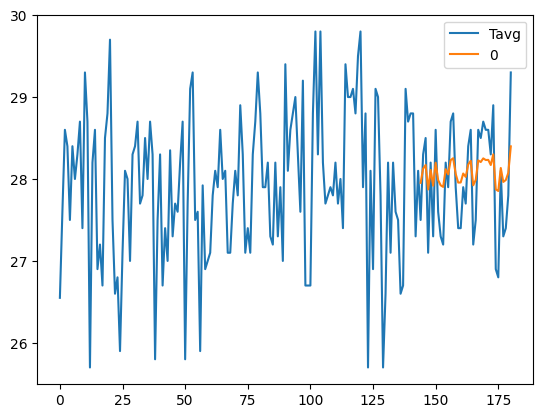

In [379]:
kan.plot()

In [380]:
new_data = [[354, 29.3],[355,29.3],[356,29.3],[357,29.3],[358,29.3],[359,29.3],[360,29.3]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.68362921, 28.68526956, 28.68690991, 28.68855026, 28.69019061,
       28.69183096, 28.69347131])

In [382]:
kan.to_json('Prediksi Papua Barat')